---

**Universidad de Costa Rica**\
Escuela de Ingeniería Eléctrica\
*IE0405 - Modelos Probabilísticos de Señales y Sistemas*

### `PyX` - Serie de tutoriales de Python para el análisis de datos


# `Py3` - *Librería de manipulación y análisis de datos Pandas*

> **Pandas** es una útil y popular librería de manipulación de datos que ofrece estructuras de datos para el análisis de tablas numéricas y series de tiempo. Esta es una introducción al objeto `DataFrame` y otras características básicas.

*Fabián Abarca Calderón* \
*Jonathan Rojas Sibaja*

---

## Librería Pandas

Para trabajar con una gran cantidad de datos, es deseable un conjunto de herramientas que nos permitan efectuar operaciones comunes de forma intuitiva y eficiente. Pandas, es la solución por defecto para hacerlo en Python, y es parte del ecosistema de SciPy. Viene instalado con Anaconda.

**Nota 0**: La documentación oficial está en [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/).

Esta guía está basada en "[Getting started tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)".

**Nota 1**: Para toda esta guía se hará la siguiente importación de librerías.

**Nota 2**: Por convención, el *alias* de Pandas es `pd`.

In [3]:
import numpy as np
import pandas as pd
import datetime

### Estructuras de datos de Pandas

Pandas permitirá la creación de las nuevas estructuras de datos `Series` y `DataFrame`, que son clases optimizadas para manipulación de datos. Aunque son similares en su forma a estructuras de Python como listas y diccionarios, en realidad incorporan una gran cantidad de nuevos atributos y métodos:

| Clase       | Atributos | Métodos |
|-------------|-----------|---------|
| `Series`    | 20+       | 180+    |
| `DataFrame` | 10+       | 210+    |

- [Documentación](https://pandas.pydata.org/docs/reference/series.html) de `Series` 
- [Documentación](https://pandas.pydata.org/docs/reference/frame.html) de `DataFrame` 
---
## 3.1. - `Series`

En Python, las `Series` corresponden a un arreglo de **una** dimensión que admite diversos tipos de datos (números enteros, palabras, números flotantes, objetos de Python, etc.) y que además están etiquetados mediante un índice que el usuario puede definir o permitir que Python lo cree por defecto. 

Para crear listas o `Series` de valores se utiliza la siguiente sintaxis:

```python
pandas.Series(data=None, index=None, 
              dtype=None, name=None, copy=False, fastpath=False)
```

donde `data` es una secuencia o estructura de datos iterable de Python, como una lista, una tupla, un diccionario, un rango, etc. El siguiente ejemplo tiene indexado automático.

In [4]:
s = pd.Series([1, 3, 5, np.nan, "modelos", 8.5])

# Ver objeto Series
print(s)

# Utilizar atributo .count
print('Número de elementos no nulos: {}.'.format(s.count()))

0          1
1          3
2          5
3        NaN
4    modelos
5        8.5
dtype: object
Número de elementos no nulos: 5.


Utilizado el comando de NumPy `random.randn` es posible generar datos aleatorios para la lista. También es posible agregar índices distintos a los numéricos, utilizando el argumento `index` y una lista de índices del mismo tamaño que los datos.

In [5]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

p = pd.Series([1, '!', 5, '?', "hola", 13], index=[6, 5, 4, 3, 2, 1])
print(p)

q = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
print(q)

a    1.873095
b   -0.342440
c    0.073822
d   -0.597517
e   -0.106082
dtype: float64
6       1
5       !
4       5
3       ?
2    hola
1      13
dtype: object
a    0
b    1
c    2
d    3
e    4
dtype: int64


Es posible hacer una inspección a los atributos y métodos de los objetos `Series` creados anteriormente con la función `dir()` de Python, y podrán apreciarse descriptores estadísticos como la correlación o la media.

In [7]:
print(dir(s))

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__'

Una vez creado el objeto `Series` se pueden ejecutar operaciones vectoriales con la misma o agregar otros atributos, como un nombre.

In [21]:
d = pd.Series(q + q, name='suma')
print(d)

e = pd.Series(q**2, name='potencia')
print(e)

a    0
b    2
c    4
d    6
e    8
Name: suma, dtype: int64
a     0
b     1
c     4
d     9
e    16
Name: potencia, dtype: int64


---
## 3.2. - `DataFrame`

En Pandas, un `DataFrame` corresponde a un arreglo etiquetado de **dos dimensiones**, semejante a concatenar varias `Series`. También admite varios tipos de datos. 

> Un `DataFrame` tiene una funcionalidad equivalente a una hoja de cálculo o una tabla SQL y permite manipular datos de forma versátil y eficiente. 

La sintaxis de creación de un `DataFrame` es:

```python
pandas.DataFrame(data=None, index=None, 
                 columns=None, dtype=None, copy=None)
```

donde `data` es típicamente un diccionario en el que cada llave/valor describe una columna. Sin embargo, se puede crear de varias otras maneras, como desde archivos JSON o CSV importados.

La asignación de las etiquetas puede ser decidida por el usuario y Python hará coincidir los valores, en caso de diferencias en los tamaños de las listas agregadas, rellenará esos espacios siguiendo reglas de sentido común. 

A continuación un ejemplo de dos `Series` de diferentes tamaños. Observar las diferencias en el orden de los índices.

In [24]:
# Creación de un diccionario con las series indexadas
d = {
     'esta': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'otra': pd.Series([1., 2., 3., 4.], index=['c', 'a', 'd', 'b'])
}

# Creación del DataFrame a partir del diccionario
df = pd.DataFrame(d)

df

,esta,otra
a,1.0,2.0
b,2.0,4.0
c,3.0,1.0
d,NaN,3.0


Con `dir()` también es posible consultar atributos y métodos disponibles de `DataFrame`.

##### Ejemplo con índice tipo "timestamp"

Los índices podrían ser una estampa de tiempo (*timestamp*). Este es un caso útil en el que, por ejemplo, se lleva un registro de varias variables (las columnas) en una sucesión de momentos distintos (el índice):

In [27]:
# Creación de un rango de fechas
fechas = pd.date_range('20200101', periods=6)

# Creación de un DataFrame con las fechas como índices
df = pd.DataFrame(np.random.randn(6, 4), index=fechas, columns=list('ABCD'))

df

,A,B,C,D
2020-01-01,-0.305376,-0.290601,0.585813,0.332390
2020-01-02,0.189397,-0.853890,1.259288,0.859878
2020-01-03,0.080523,-0.336602,-0.580755,0.659526
2020-01-04,-0.251994,-0.037249,-0.941118,1.203315
2020-01-05,0.450226,0.341044,1.117566,0.543163
2020-01-06,0.699176,0.061834,-0.689426,-0.382885


##### Ejemplo con distintos tipos de datos

Como en las `Series`, los `DataFrame` pueden utilizar diferentes tipos de datos en cada columna y asignarse como diccionarios.

In [9]:
df = pd.DataFrame({'A': 1.,
                   'B': pd.Timestamp('20200101'),
                   'C': pd.Series(1, index=list(range(4))),
                   'D': np.array([3] * 4, dtype='int32'),
                   'E': pd.Categorical(['norte', 'sur', 'este', 'oeste']),
                   'F': 'hola'
                  })

df

,A,B,C,D,E,F
0,1.0,2020-01-01,1,3,norte,hola
1,1.0,2020-01-01,1,3,sur,hola
2,1.0,2020-01-01,1,3,este,hola
3,1.0,2020-01-01,1,3,oeste,hola


#### Modificaciones al `DataFrame`

Una vez incializado el `DataFrame`, se pueden ejecutar acciones como extraer, eliminar e insertar columnas, con una sintaxis similar a la de los [diccionarios](https://www.w3schools.com/python/python_dictionaries.asp).

In [10]:
# Extraer una columna
df['E']

0    norte
1      sur
2     este
3    oeste
Name: E, dtype: category
Categories (4, object): ['este', 'norte', 'oeste', 'sur']

In [11]:
# Eliminar columna 'F'
del df['F']

# Mostrar nuevo DataFrame sin columna 'F'
df

,A,B,C,D,E
0,1.0,2020-01-01,1,3,norte
1,1.0,2020-01-01,1,3,sur
2,1.0,2020-01-01,1,3,este
3,1.0,2020-01-01,1,3,oeste


In [12]:
# Asignar nuevos datos a la columna 'A'
df['A'] = pd.Series(np.random.randn(4), index=list(range(4)))

df

,A,B,C,D,E
0,2.650651,2020-01-01,1,3,norte
1,-0.253413,2020-01-01,1,3,sur
2,-1.565331,2020-01-01,1,3,este
3,0.357056,2020-01-01,1,3,oeste


In [13]:
# Crear nueva columna 'A+' y agregar valores según criterio
df['A+'] = df['A'] > 0

# Mostrar nuevo DataFrame
df

,A,B,C,D,E,A+
0,2.650651,2020-01-01,1,3,norte,True
1,-0.253413,2020-01-01,1,3,sur,False
2,-1.565331,2020-01-01,1,3,este,False
3,0.357056,2020-01-01,1,3,oeste,True


---
## 3.3. - Inspeccionar los datos

Es posible (y útil) "echar un vistazo" a los primeros y últimos datos. Por ejemplo, del `DataFrame` llamado `df` se pueden ver las primeras ***N*** filas de datos con el comando `head`.

In [14]:
df.head(2)

,A,B,C,D,E,A+
0,2.650651,2020-01-01,1,3,norte,True
1,-0.253413,2020-01-01,1,3,sur,False


Si solamente se desea visualizar las útimas tres líneas se utiliza el comando `tail`:

In [15]:
df.tail(3)

,A,B,C,D,E,A+
1,-0.253413,2020-01-01,1,3,sur,False
2,-1.565331,2020-01-01,1,3,este,False
3,0.357056,2020-01-01,1,3,oeste,True


Para visualizar los índices, se utiliza:

In [16]:
df.index

Int64Index([0, 1, 2, 3], dtype='int64')

##### Ejemplo de convertir a NumPy

Cuando sea deseable, se puede transformar el `DataFrame` a un `array` de NumPy.

In [17]:
df.to_numpy()

array([[2.6506511089673377, Timestamp('2020-01-01 00:00:00'), 1, 3,
        'norte', True],
       [-0.25341331263202166, Timestamp('2020-01-01 00:00:00'), 1, 3,
        'sur', False],
       [-1.5653308021548715, Timestamp('2020-01-01 00:00:00'), 1, 3,
        'este', False],
       [0.35705631626850187, Timestamp('2020-01-01 00:00:00'), 1, 3,
        'oeste', True]], dtype=object)

Lo anterior tanto si el `DataFrame` tiene un solo tipo o diversos tipos de datos.

##### Ejemplo de manipulación para un solo tipo de datos

Si todos los elementos son del mismo tipo, se pueden ejecutar algunas funciones de análisis y manipulación específicas, especialmente si son datos numéricos.

A continuación se crea un `DataFrame` tipo matriz 6$\times$4 de números aleatorios.

In [38]:
df_num = pd.DataFrame(np.random.randn(6, 4), columns=list("ABCD"), index=['a', 'b', 'c', 'd', 'e', 'f'])

df_num

,A,B,C,D
a,-0.034604,0.324489,0.739115,-0.261279
b,-1.397991,-1.903007,0.190106,-0.143523
c,0.157683,0.740475,0.157478,-0.085212
d,-0.245452,-0.906531,1.423349,-0.648389
e,0.799703,-0.679715,-0.025990,-0.373343
f,0.533653,0.714346,0.455524,-0.948095


Es posible obtener un resumen de los principales descriptores estadísticos de cada columna, en este caso: el conteo de elementos, la media, la desviación estándar, el valor mínimo, el primer, segundo y tercer cuartil, y el valor máximo.

In [39]:
df_num.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.031168,-0.284990,0.489930,-0.409974
std,0.769307,1.056581,0.529366,0.330555
min,-1.397991,-1.903007,-0.025990,-0.948095
25%,-0.192740,-0.849827,0.165635,-0.579627
50%,0.061539,-0.177613,0.322815,-0.317311
75%,0.439661,0.616882,0.668217,-0.172962
max,0.799703,0.740475,1.423349,-0.085212


##### Reordenar datos

Es común desear reordenar los datos con alguna columna de referencia:

In [40]:
df_num.sort_values(by='B')

,A,B,C,D
b,-1.397991,-1.903007,0.190106,-0.143523
d,-0.245452,-0.906531,1.423349,-0.648389
e,0.799703,-0.679715,-0.025990,-0.373343
a,-0.034604,0.324489,0.739115,-0.261279
f,0.533653,0.714346,0.455524,-0.948095
c,0.157683,0.740475,0.157478,-0.085212


---
## 3.4. - Seleccionar datos

> En Python, la selección (o búsqueda) de datos utilizando Pandas es más eficiente que las expresiones para seleccionar y obtener datos en NumPy. 

Por ejemplo, para ubicar una **fila** de datos, se puede utilizar el comando  `loc`, que tiene muchas opciones para buscar índices, según la [documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html).

In [41]:
df.loc[2]

A                0.790266
B     2020-01-01 00:00:00
C                       1
D                       3
E                    este
A+                   True
Name: 2, dtype: object

También se pueden seleccionar un rango de filas (registros) al mismo tiempo:

In [42]:
df[0:3]

,A,B,C,D,E,A+
0,0.249437,2020-01-01,1,3,norte,True
1,-1.441236,2020-01-01,1,3,sur,False
2,0.790266,2020-01-01,1,3,este,True


Para obtener una posición en específico, se debe indicar la fila y la columna mediante el comando `at`:

In [43]:
df.at[2, 'E']

'este'

Se puede ubicar ese mismo elemento por medio de la posición y no los índices, utilizando el comando `iloc`:

In [44]:
df.iloc[2, 4]

'este'

Se pueden ubicar los datos que cumplan con cierta condición booleana:

In [48]:
df[df['A'] > 0]

,A,B,C,D,E,A+
0,0.249437,2020-01-01,1,3,norte,True
2,0.790266,2020-01-01,1,3,este,True


In [47]:
df[df['E'] == 'sur']

,A,B,C,D,E,A+
1,-1.441236,2020-01-01,1,3,sur,False


---
## 3.5. - Operaciones sobre datos

En Python, las operaciones se ejecutan sobre todos los datos arrojando el valor de salida por filas o columnas.

Por ejemplo, para calcular la media estadística de los datos de cada columna, se utiliza el comando `mean` que recorre la dimensión `0` (filas) de la siguiente manera:

In [55]:
df_num.mean(0)

A   -0.031168
B   -0.284990
C    0.489930
D   -0.409974
dtype: float64

Si en cambio se desea conocer la media de los valores por filas, se utiliza la siguiente variación, donde `1` es la dimensión de las columnas:

In [56]:
df_num.mean(1)

a    0.191930
b   -0.813604
c    0.242606
d   -0.094256
e   -0.069836
f    0.188857
dtype: float64

##### Ejemplo de conteo de ocurrencias de valores únicos

Para la siguiente serie de ejemplo:

In [22]:
letras = ['a', 'b', 'c', 'd', 'e']
serie = pd.Series(np.random.choice(letras, size=15))
serie

0     e
1     e
2     c
3     b
4     a
5     b
6     d
7     e
8     b
9     a
10    b
11    e
12    c
13    c
14    b
dtype: object

Se pueden aplicar operaciones tales como el conteo (o "apariciones de cada uno") sobre `Series` o `DataFrame`, y devuelve un resultado clasificado de mayor a menor número de ocurrencias.

In [23]:
serie.value_counts()

b    5
e    4
c    3
a    2
d    1
dtype: int64

In [67]:
df.value_counts(df['A+'])

A+
False    2
True     2
dtype: int64

##### Operaciones sobre caracteres

También existen operaciones que se pueden aplicar sobre `Series` de palabras:

In [25]:
G = pd.Series(['ÁRbOL', 'BLanCO', 'AvE', 'BuRRo'])
g = G.str.lower()

pd.DataFrame({'G': G, 'g': g})

,G,g
0,ÁRbOL,árbol
1,BLanCO,blanco
2,AvE,ave
3,BuRRo,burro


---
## 3.6. - Fusionar datos

En Pandas, para concatenar datos se utiliza el comando `concat()` donde

```python
pandas.concat(objs, axis=0, join='outer', ignore_index=False, 
              keys=None, levels=None, names=None, verify_integrity=False, 
              sort=False, copy=True)[source]
```

donde `axis=` determine a lo largo de cuál dimensión se concatenan: `0` filas (vertical) y `1` columnas (horizontal) de la siguiente forma:

In [26]:
# Crear DataFrame de ejemplo
df_a = pd.DataFrame(np.random.randn(5,2))
df_b = pd.DataFrame(np.random.randn(5,2))

# Extraer fragmentos y concatenarlos
fragmentos = [df_a[:], df_b[:]]
pd.concat(fragmentos, axis=0)

,0,1
0,0.293672,-1.001027
1,-0.236864,1.030324
2,-2.144926,-1.208563
3,0.134009,2.780410
4,1.299179,-1.496314
0,0.498290,-0.715241
1,0.074266,0.649490
2,1.409027,0.656835
3,-0.825233,0.095680
4,-1.182194,-0.582173


**Nota**: Observar que es necesario extraer los fragmentos primero porque no se pueden concatenar `DataFrame` directamente.

---
## 3.7. - Agrupar datos

En Pandar, "agrupar" se refiere a:

- Separar los datos en grupos basándose en un criterio.
- Aplicar una función a cada grupo independientemente.
- Combinar los resultados en una estructura de datos.

A continuación hay un ejemplo de agrupación aplicando una suma a las columnas numéricas asociadas por cierto criterio:

In [80]:
df_foo = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo'],
                       'B': ['uno', 'dos', 'dos', 'tres', 'dos'],
                       'C': np.random.randn(5),
                       'D': np.random.randn(5)})
df_foo

,A,B,C,D
0,foo,uno,0.522535,-0.629210
1,bar,dos,1.384662,-0.557385
2,foo,dos,0.789914,-0.363806
3,bar,tres,-1.839363,0.458134
4,foo,dos,-0.426734,-1.146150


El siguiente resultado agrupa las filas según los elementos en `A` y suma los resultados de las columnas no categóricas (es decir, numéricas), que en este caso son `C` y `D`.

In [81]:
df_foo.groupby('A').sum()

,C,D
A,,
bar,-0.454701,-0.099250
foo,0.885715,-2.139166


El siguiente resultado agrupa primero por `A` y luego por `B`, para finalmente sumar las columnas `C` y `D` asociadas.

In [82]:
df_foo.groupby(['A', 'B']).sum()

C         D
A   B                       
bar dos   1.384662 -0.557385
    tres -1.839363  0.458134
foo dos   0.363180 -1.509956
    uno   0.522535 -0.629210

---
## 3.8. - Reacomodar datos

##### Apilar

En Pandas, una forma de reacomodar los datos es mediante el comando `stack`:

In [83]:
pila = df.stack()

pila

0  A                0.249437
   B     2020-01-01 00:00:00
   C                       1
   D                       3
   E                   norte
   A+                   True
1  A               -1.441236
   B     2020-01-01 00:00:00
   C                       1
   D                       3
   E                     sur
   A+                  False
2  A                0.790266
   B     2020-01-01 00:00:00
   C                       1
   D                       3
   E                    este
   A+                   True
3  A               -0.332675
   B     2020-01-01 00:00:00
   C                       1
   D                       3
   E                   oeste
   A+                  False
dtype: object

##### Tabla pivote

También se puede cambiar la forma de ordenar los datos como tablas pivote:

In [84]:
df_piv = pd.DataFrame({'A': ['uno', 'uno', 'dos', 'tres']*3,
                       'B': ['A', 'B', 'C']*4,
                       'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar']*2,
                       'D': np.random.randn(12),
                       'E': np.random.randn(12)})
df_piv

,A,B,C,D,E
0,uno,A,foo,-0.629364,0.184365
1,uno,B,foo,-0.047351,-1.205745
2,dos,C,foo,0.149739,-0.355716
3,tres,A,bar,0.576823,-0.757979
4,uno,B,bar,-0.527473,1.443430
5,uno,C,bar,-0.647224,-0.827692
6,dos,A,foo,-1.131522,1.297435
7,tres,B,foo,-0.422288,0.830308
8,uno,C,foo,0.756812,0.625534
9,uno,A,bar,2.203006,-0.126867


En la siguiente tabla va a sumar los valores en `D` asociados con la agrupación con respecto a `A` y `B`, para cada categoría en `C`. Es una herramienta **poderosa**.

In [85]:
v = pd.pivot_table(df_piv, values='D', 
                   index=['A', 'B'], columns=['C'])
v

C            bar       foo
A    B                    
dos  A       NaN -1.131522
     B -1.510066       NaN
     C       NaN  0.149739
tres A  0.576823       NaN
     B       NaN -0.422288
     C  1.330278       NaN
uno  A  2.203006 -0.629364
     B -0.527473 -0.047351
     C -0.647224  0.756812

¿Cómo extraer un elemento de una tabla pivote?

In [86]:
v['bar']['dos']['B']

-1.5100661685130445

---
## 3.9. - Series de tiempo

En Pandas, las series de tiempo permiten generar secuencias con una frecuencia fija en un lapso de tiempo, como por ejemplo:

In [27]:
# Tres ciclos horarios que inician el 1 de enero de 2020
dti = pd.date_range('1-1-2020', periods=3, freq='H')
dti

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

Cuya hora se puede convertir a una zona horaria diferente:

In [29]:
dti = dti.tz_localize('America/Costa_Rica')
dti

DatetimeIndex(['2020-01-01 00:00:00-06:00', '2020-01-01 01:00:00-06:00',
               '2020-01-01 02:00:00-06:00'],
              dtype='datetime64[ns, America/Costa_Rica]', freq=None)

También se pueden convertir una serie de tiempo a una frecuencia particular:

In [ ]:
idx = pd.date_range('2020-01-01', periods=5, freq='H')
ts = pd.Series(range(len(idx)), index=idx)
ts

In [ ]:
ts.resample('2H').mean()

---
## 3.10. - Gráficas

En Python, se utiliza la asignación estándar para utilizar los comandos del API de `matplotlib` como métodos de la `Series` y `DataFrame`. Así, por ejemplo, se puede graficar una `Serie` de datos:

Text(0, 0.5, 'Valor')

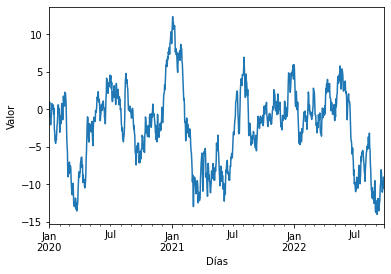

In [30]:
import matplotlib.pyplot as plt

plt.close('all')

# Crear serie temporal
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2020', periods=1000))

# Suma acumulada
ts = ts.cumsum()

# Método .plot() de Matplotlib sobre la serie temporal
ts.plot()
plt.xlabel('Días')
plt.ylabel('Valor')

También se pueden graficar arreglos del tipo `DataFrame` de manera que se grafican varias curvas en una misma gráfica como se muestra a continuación:

Text(0, 0.5, 'Valor')

<Figure size 432x288 with 0 Axes>

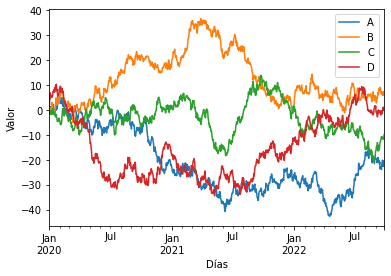

In [31]:
# Crear números aleatorias con el mísmo índice de ts
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                 columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

# Graficar las curvas
plt.figure()
df.plot()
plt.legend(loc='best')
plt.xlabel('Días')
plt.ylabel('Valor')

---
## 3.11. - Importar y exportar datos

Pandas es un excelente "manejador" de archivos externos de datos, tipo `.xls` o `.csv`. Por ejemplo, para crear un archivo `modelos.csv` a partir de los datos anteriores:

In [ ]:
df.to_csv('modelos')

Cuyo contenido se puede "llamar" nuevamente utilizando el comando a continuación, que lo guarda como un `DataFrame`.

In [ ]:
pd.read_csv('modelos')

---
### Más información

* [Página oficial de Pandas](https://pandas.pydata.org/)

---

---
**Universidad de Costa Rica**\
Facultad de Ingeniería\
Escuela de Ingeniería Eléctrica

&copy; 2021

---